In [1]:
import keras

Using TensorFlow backend.


In [2]:
from ModelFactory import ModelFactory

model = ModelFactory.load_model_from_file("vgg16", "/media/tim/Data/Work/CBS/DeepSolaris/Models/vgg16_pr_imagenet_al_False_AcMüDüHo_e_200_bs_64_op_rmsprop_2018-08-23_64_200/vgg16__21_0.85.hdf5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [3]:
import os

image_dir = r"/media/tim/Data/Work/CBS/Heerlen75x75/Heerlen75x75/"

image_files = [filename for filename in os.listdir(image_dir) if "mask" not in filename and "masked" not in filename]
len(image_files)

21236

In [5]:
from keras.preprocessing.image import load_img, img_to_array

images = [load_img(os.path.join(image_dir, image)) for index, image in enumerate(image_files) if index < 1000]

#for image in images:
#    image.thumbnail((75,75))
    
images = [img_to_array(image) for image in images]
images[0].shape

(75, 75, 3)

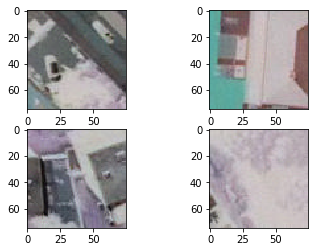

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2)
ax[0,0].imshow(images[0])
ax[0,1].imshow(images[250])
ax[1,0].imshow(images[500])
ax[1,1].imshow(images[-1])

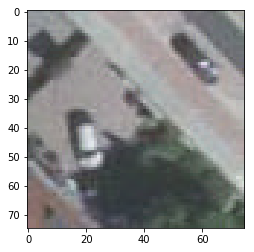

In [7]:
#RGB to BGR
plt.imshow(images[0]*255)

In [8]:
import numpy as np

predictions = model.predict(np.array(images))

threshold = 0.5
labels = predictions >= threshold

positives = []
negatives = []
for index, label in enumerate(labels):
    if label:
        positives.append(images[index])
    else:
        negatives.append(images[index])
    
    

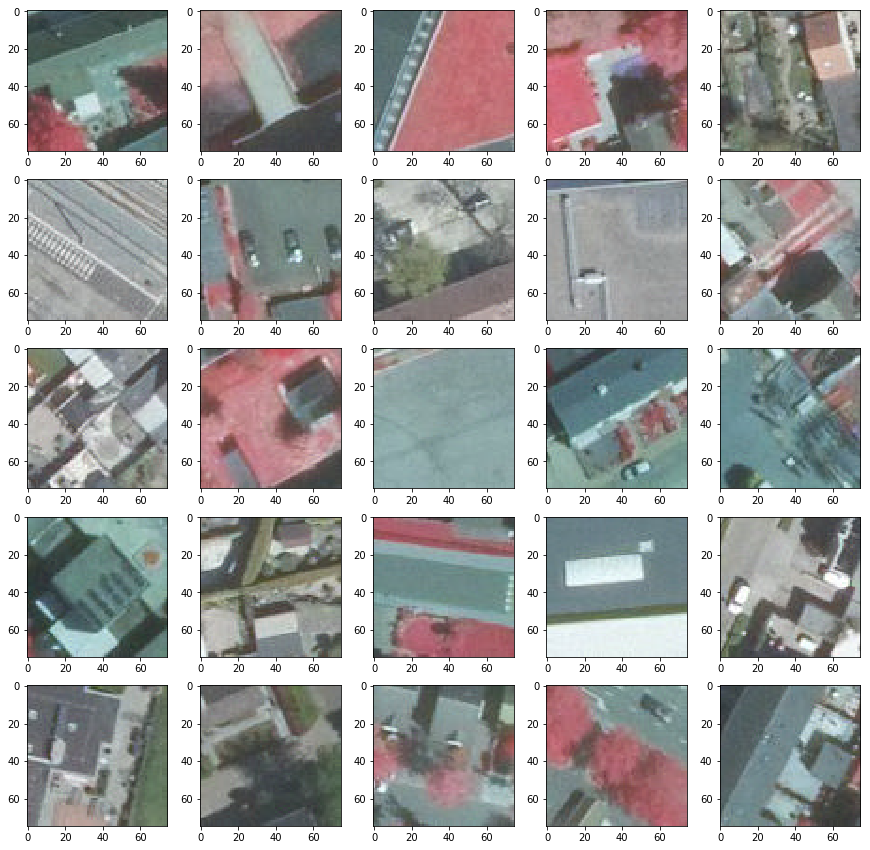

In [9]:
def plot_images(selected_images, rows, columns):
    _, ax = plt.subplots(rows,columns, figsize=(15,15))
    i = 0
    for r in range(rows):
        for c in range(columns):
            ax[r,c].imshow(selected_images[i] * 255)
            i += 1
            
plot_images(positives, 5, 5)

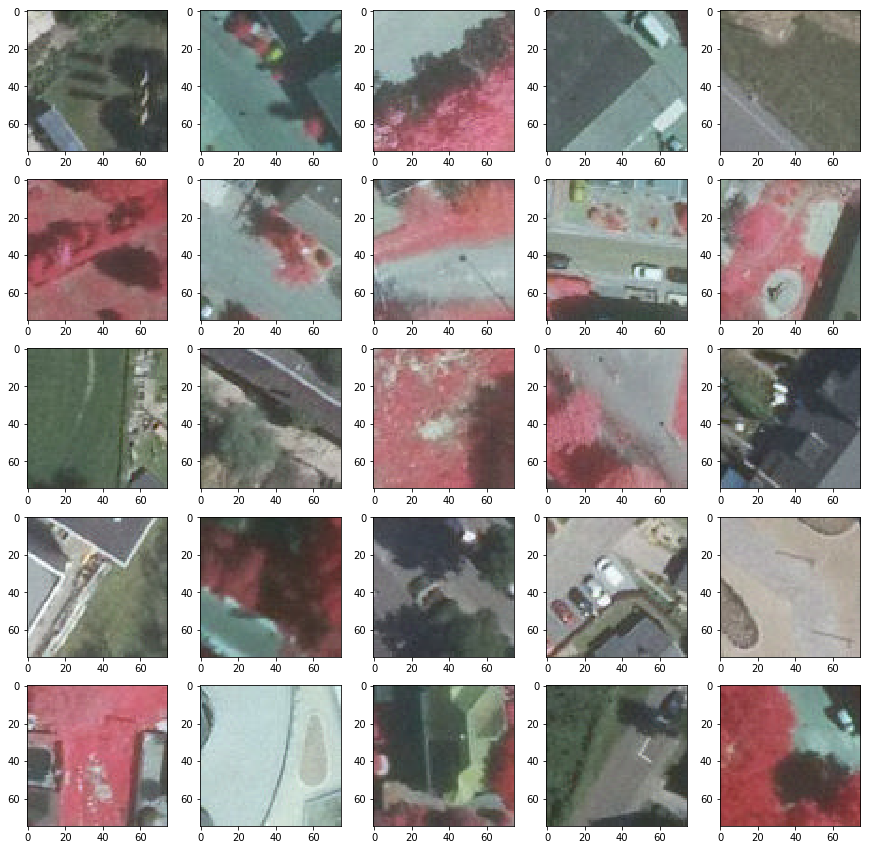

In [10]:
plot_images(negatives[50:], 5, 5)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

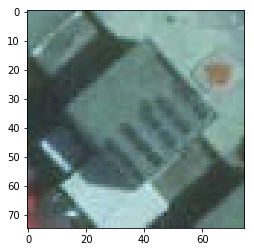

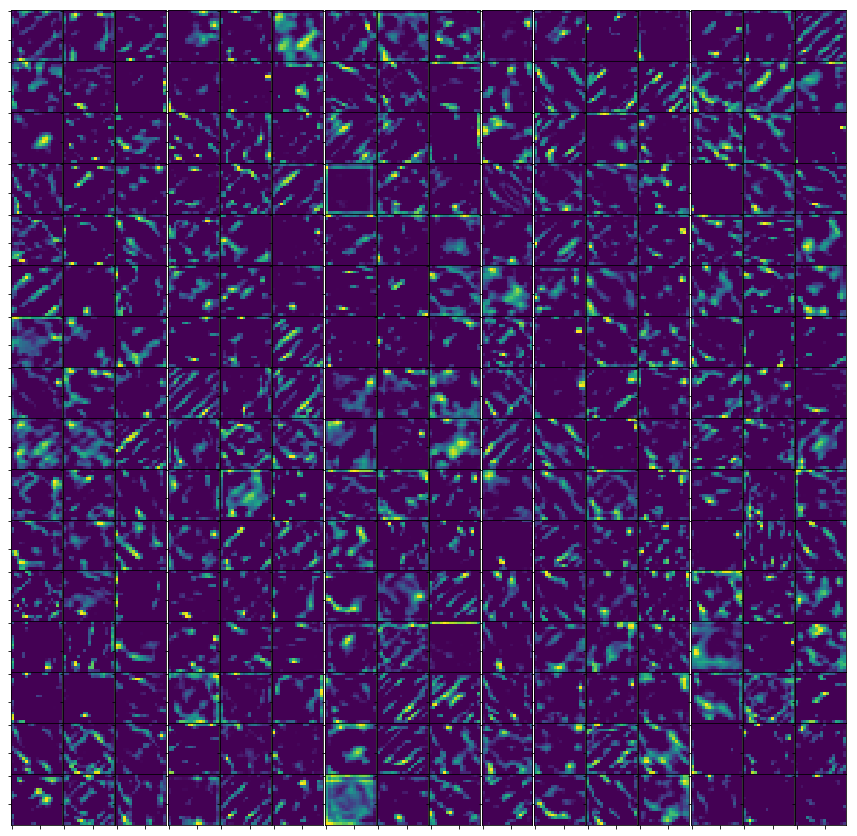

In [11]:
from keras.models import Model

def visualize_layer(output_img,columns=16):
    rows = output_img.shape[2] // columns

    fig, ax = plt.subplots(rows, columns, figsize=(15,15))
    i = 0    
    for r in range(rows):
        for c in range(columns):
            ax[r, c].imshow(output_img[:,:,i])
            ax[r, c].set_xticklabels([])
            ax[r, c].set_yticklabels([])
            i += 1
    plt.subplots_adjust(wspace=0, hspace=0)
    

def model_until_layer(model, layer_name):
    layer = model.get_layer(layer_name)
    base_model = Model(model.input, layer.output)
    base_model.summary()
    return base_model



image = positives[15] 
plt.imshow(image * 255)

base_model = model_until_layer(model, "block3_conv3")
batch_input = np.expand_dims(image, axis=0)
output = base_model.predict(batch_input)
print(output.shape)

output_img = np.squeeze(output, axis=0)
           
visualize_layer(output_img, 16)

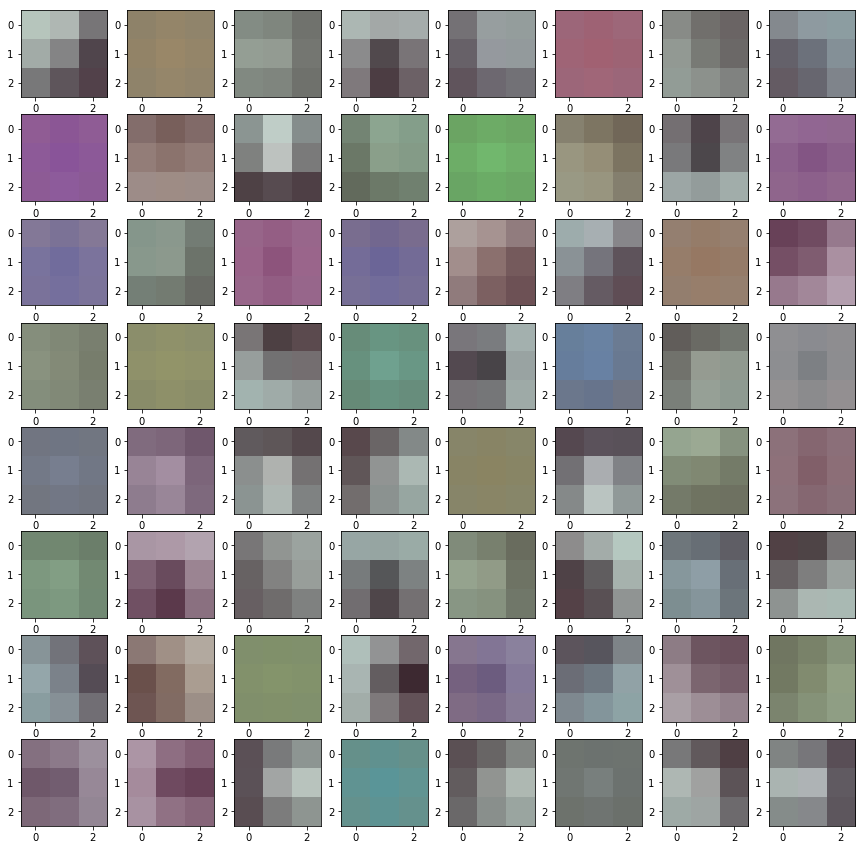

In [52]:
import keras.backend as K

layer = model.layers[1]
conv = layer.weights[0]
weights = conv.eval(session=K.get_session())

fig, ax = plt.subplots(8,8, figsize=(15,15))
i = 0
for r in range(8):
    for c in range(8):
        ax[r,c].imshow((weights[:,:,:,i] + 1.0) / 2)
        i += 1

In [33]:
def evaluate_image(model, image):
    batch_input = image.expand_dims(image, axis=0)
    output = model.predict(batch_input)
    output_img = np.squeeze(output, axis=0)
    return output_img

